In [10]:
import torch 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn 
import torch.nn.functional as F

In [9]:
#Define dataset directories
train_path = r"C:\Users\Asus\Desktop\ML\Deep-Learning\FER-2013\train"
test_path = r"C:\Users\Asus\Desktop\ML\Deep-Learning\FER-2013\test"

In [3]:
#define image transformations 
transform = transforms.Compose([transforms.Resize((48,48)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean = [0.5], std = [0.5])
                                ])


In [4]:
#load the dataset 
train_dataset = datasets.ImageFolder(root = train_path, transform = transform)
test_dataset = datasets.ImageFolder(root = test_path, transform = transform)


In [5]:
#Create dataloaders
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [6]:
train_dataset.classes


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


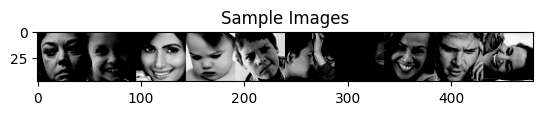

In [7]:
import matplotlib.pyplot as plt

# Get a batch of data
images, labels = next(iter(train_loader))
grid = torch.cat([images[i].squeeze(0) for i in range(10)], dim=2)  # Combine 10 images in a row
grid = grid.permute(1, 2, 0).numpy()  # Change shape to (height, width, channels) and convert to numpy array
plt.imshow(grid, cmap='gray')
plt.title("Sample Images")
plt.show()

In [13]:
#CNN model
class CNN(nn.Module):
    """
    Defines the layer of the CNN for the facial recognition task.
    Inherits torch.nn.Module class for operations related to CNN.
        
    """
    def __init__(self, output_classes = 7):
        
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size = 3, stride = 3)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride =1)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride = 2)
        self.fc = nn.Linear(16 * 16 *7, output_classes)

        